In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
(30, 17)


In [4]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Data Standardization



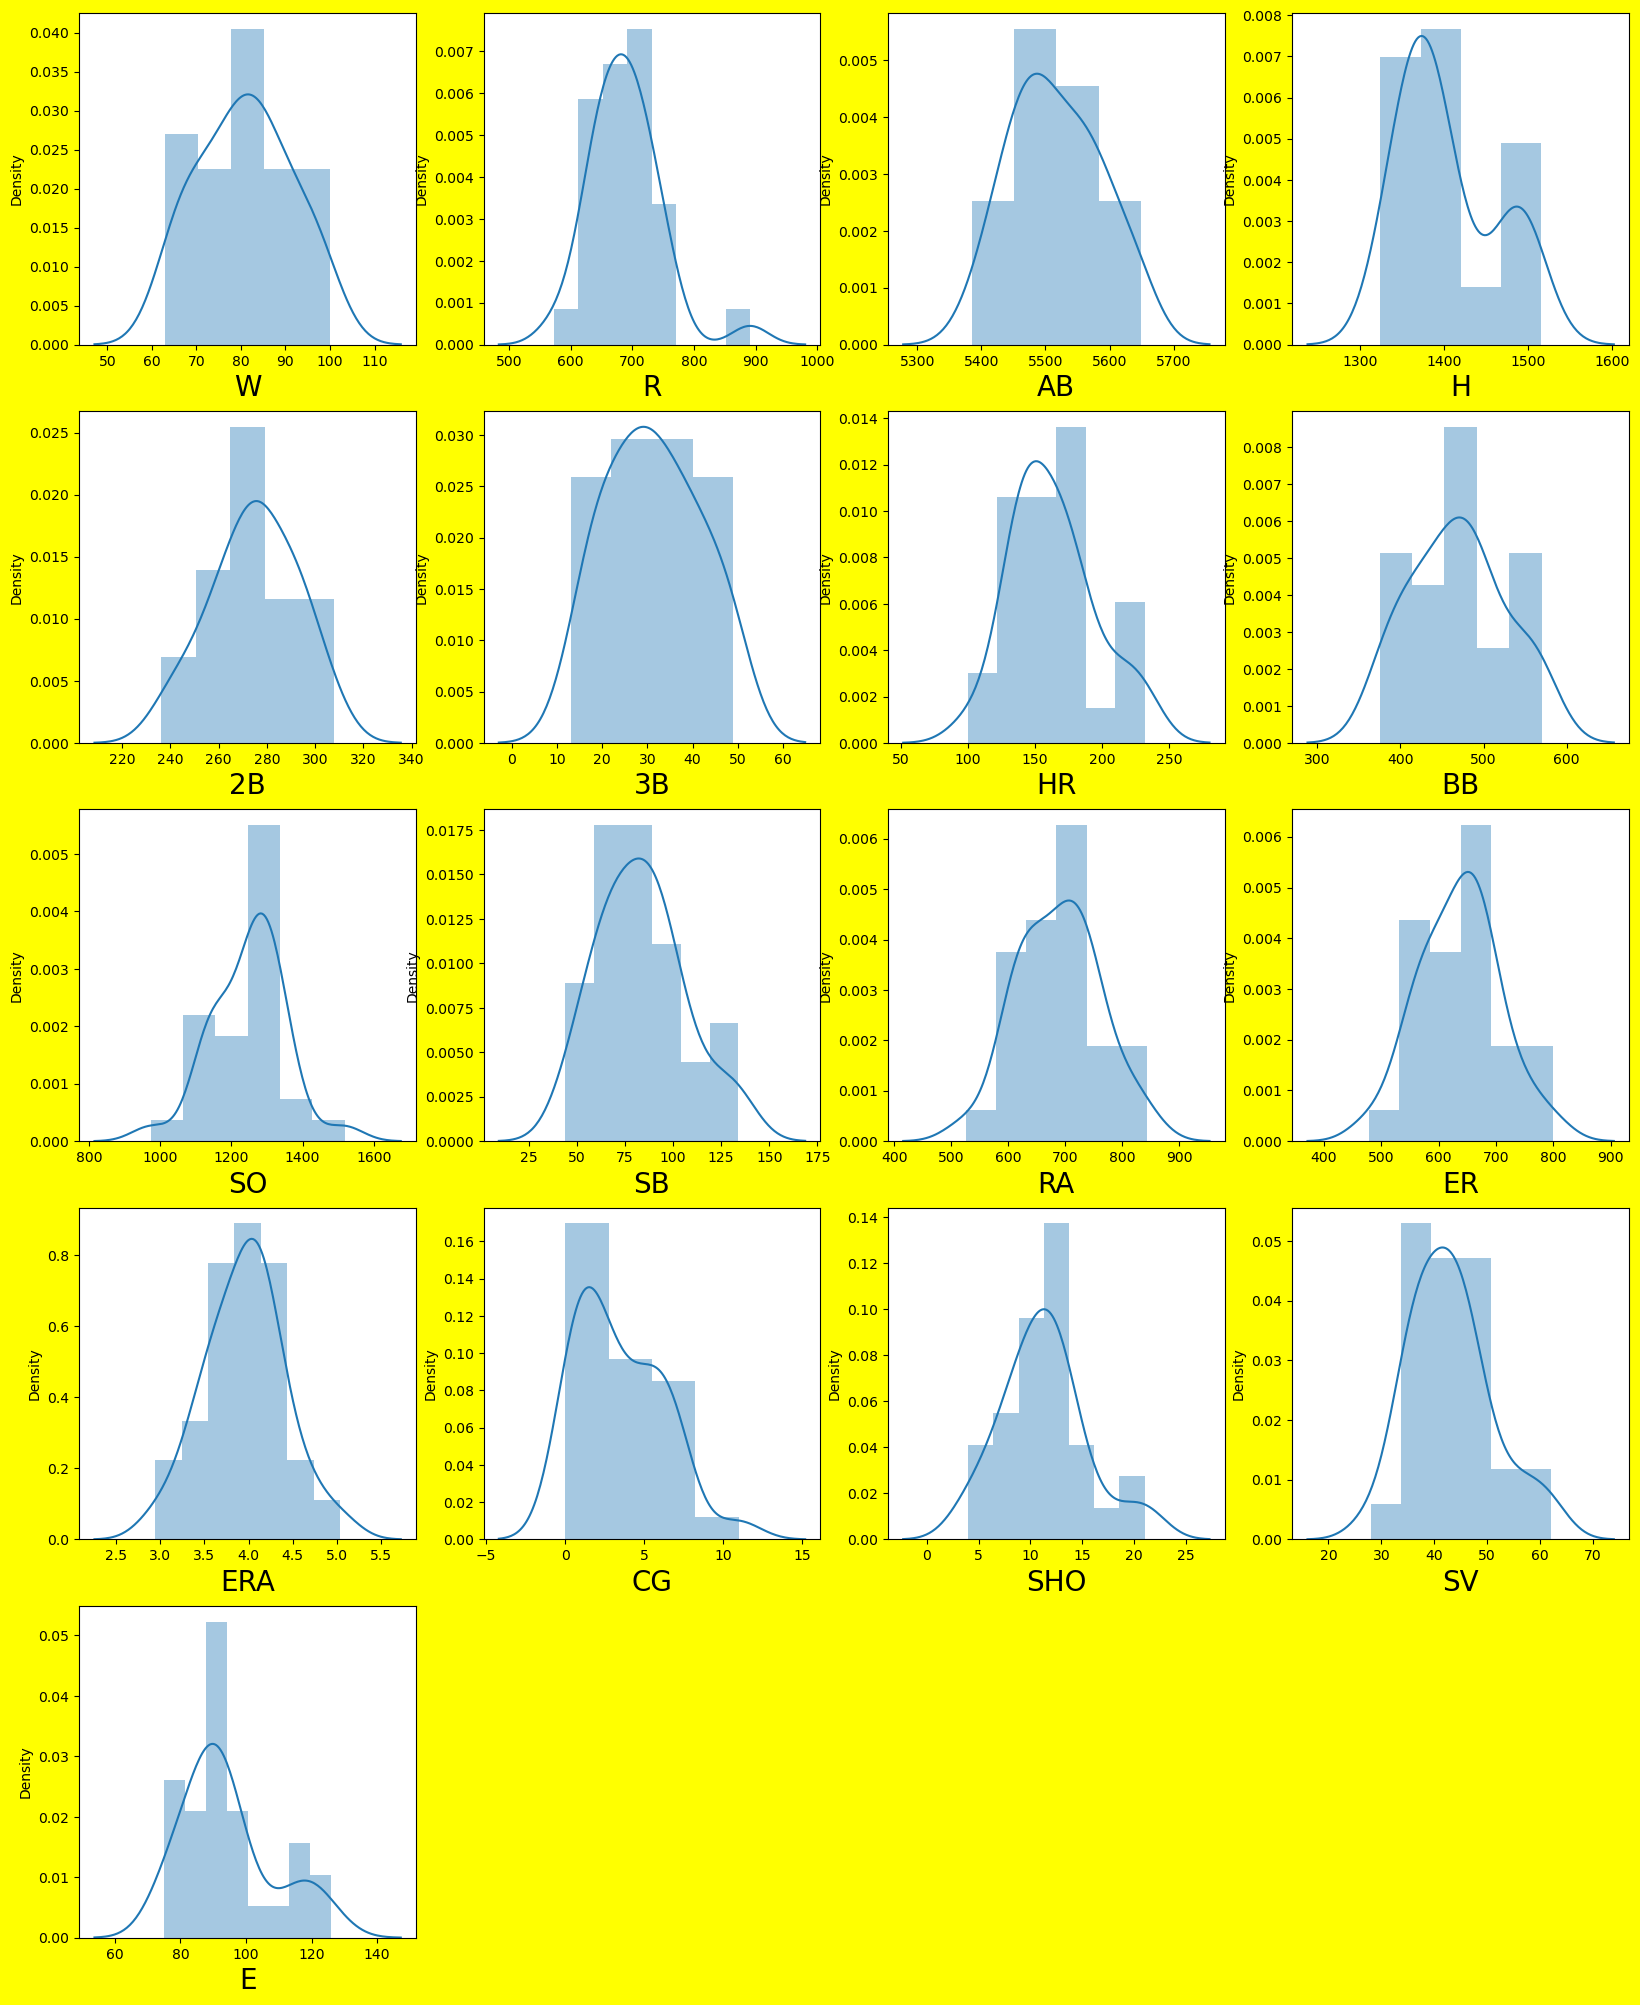

In [5]:
# Let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=17 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1   
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

### Finding relationship. We want to keep only those features which have relationship with Label.

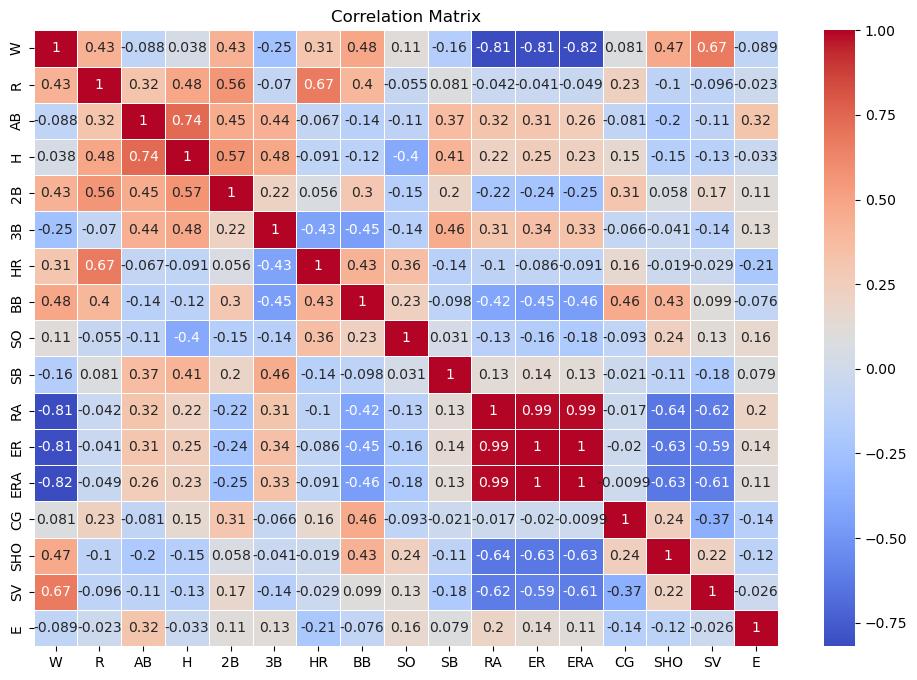

In [6]:
# Correlation matrix to see relationships between features and the target (Wins)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Based on the correlation matrix, let's remove the features with weak correlations to the target variable W. Specifically, we will remove:

AB (At Bats)
3B (Triples)
SO (Strikeouts)
SB (Stolen Bases)
CG (Complete Games)
SHO (Shutouts)
SV (Saves)
E (Errors)

In [3]:
X = data.drop(columns=['AB', '3B', 'SO', 'SB', 'CG', 'SHO', 'SV', 'E','W'])
y = data['W']

In [4]:
 # Data Scaling. Formula Z = (X - mean)/std
    
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [5]:
# Split data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.25,random_state=348)
y_train.head()

15    100
11     86
4      74
12     85
24     63
Name: W, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Model instantiating and training

In [7]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = regression.predict(x_test)
y_pred

array([83.7899464 , 88.09690822, 76.13087774, 75.98490968, 56.10759886,
       99.10744597, 85.26964497, 87.60364916])

In [9]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 49.52799294945139
R-squared: 0.529145640409256


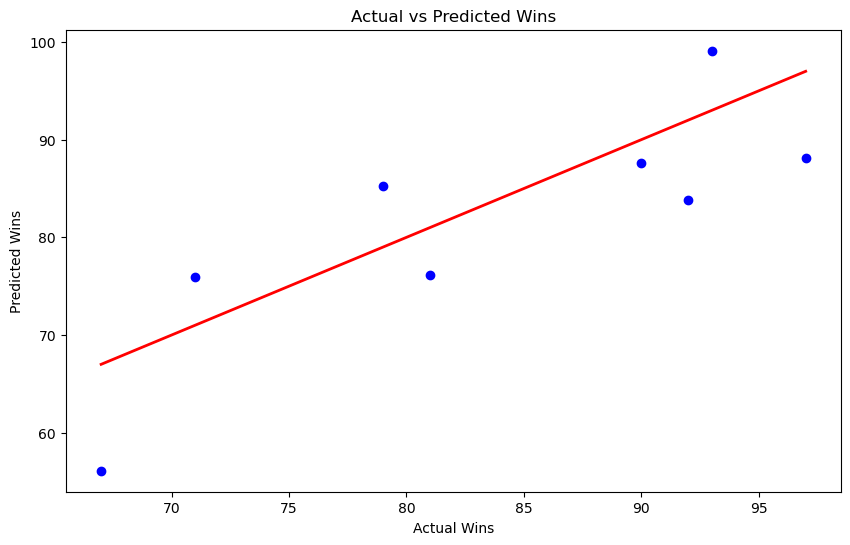

In [19]:
# Plot the actual vs predicted wins
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Wins")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show()

## You have succesfully completed building Linear Regression model

Now let's check if our model is overfitting our data using regularization

In [10]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [11]:
lasscv = LassoCV(alphas= None, max_iter= 10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [12]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.5261473448250554

In [13]:
# now that we have best parameter, let's use lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.5261473448250554)

In [14]:
lasso_reg.score(x_test, y_test)

0.8168371900688441

In [23]:
import numpy as np

In [24]:
# RidgeCV will return best alpha and cofficients after performing 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [25]:
ridgecv.alpha_

0.011

In [26]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [27]:
ridge_model.score(x_test, y_test)

0.5963242295344532

In [20]:
#Hyperparameter tuning 
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization parameter
}

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')


Best parameters: {'alpha': 1}
Best model MSE: 49.52799294945139
Best model R2 Score: 0.8257905480267203


In [28]:
#Hyperparameter tuning 
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization parameter
}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')


Best parameters: {'alpha': 10}
Best model MSE: 49.52799294945139
Best model R2 Score: 0.8188264571515789
